### Simple Reccommedations

Importing necessary libraries

In [152]:
import pandas as pd
import numpy as np

In [153]:
anime = pd.read_csv('/content/drive/My Drive/anime data/anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Cleaning up the name column from non-alphanumeric characters


In [154]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [155]:
#converting the name column into string datatype
anime['name'] = anime['name'].astype('str')

In [156]:
#creating the function to remove the characters
import re
def clean_up(s):
  new_s = re.sub(r"[^\sa-zA-Z0-9\.\,\;]","",str(s))
  return new_s


In [157]:
anime['name'] = anime['name'].apply(clean_up)

In [158]:
#after clean-up
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [190]:
ratings = pd.read_csv('/content/drive/My Drive/anime data/rating.csv')
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [191]:
len(ratings)

7813737

In [192]:
#dropping all rows with rating value of -1. ie. the user_id did not rate the anime
ratings = ratings[ratings['rating'] != -1]
len(ratings)

6337241

In [163]:
anime.shape

(12294, 7)

In [164]:
ratings.shape

(6337241, 3)

In [165]:
#renaming rating in anime df rating to average rating
anime.rename(columns={'rating':'average_rating'}, inplace=True)

In [166]:
anime.head()

,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Merging both the anime and rating dataframes

### Important points to grasp about the datasets
In the anime.csv file, **anime_id** is **unique** for each row.
In the rating.csv file, **anime_id** is **unique**, but **user_id** is **not unique**. 
When we merge both, **user_id** becomes **unique**, and anime_id is no longer.

In [193]:
#we merge based on anime_id cus they're both common in the 2 dataframes
df_merged = pd.merge(ratings,anime,on='anime_id')

In [194]:
df_merged.shape

(6337239, 9)

In [196]:
df_merged.head(3) 

,user_id,anime_id,rating,name,genre,type,episodes,average_rating,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


#### Note that: There are 69,600 unique user ids and 9,926 unique anime ids

In [201]:
#unique user ids
len(df_merged['user_id'].unique())

69600

In [202]:
#unique anime ids
len(df_merged['anime_id'].unique())

9926

In [203]:
#shuffling the dataframe
df_merged = df_merged.sample(n=len(df_merged), random_state=42)

In [204]:
#we're going to use only 200,000 of the dataset to avoid RAM issues
df_merged = df_merged[:200000]

In [205]:
#checking out the new head of the dataframe after shuffling
df_merged.head()

,user_id,anime_id,rating,name,genre,type,episodes,average_rating,members
5589647,33460,238,9,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe...",TV,42,7.44,35258
1898051,56212,17895,9,Golden Time,"Comedy, Romance, Seinen",TV,24,7.92,273191
1215622,11329,5680,7,KOn,"Comedy, Music, School, Slice of Life",TV,13,7.87,386048
4476341,50678,5630,10,Higashi no Eden,"Action, Comedy, Drama, Mystery, Romance, Sci-F...",TV,11,8.03,276593
77210,6265,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


### EDA - Visualizing Imports

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Creating ratings dataframe with number of ratings

In [175]:
#getting the number of users that voted for each anime (ie the number of times each anime_id appeared in the dataframe)
df_merged.groupby('name')['members'].count().sort_values(ascending=False).head()

name
Death Note                        1086
Sword Art Online                   830
Shingeki no Kyojin                 802
Elfen Lied                         765
Code Geass Hangyaku no Lelouch     745
Name: members, dtype: int64

Creating a dataframe of anime name with the count of their ratings 

In [207]:
new_df = pd.DataFrame(df_merged.groupby('name')['members'].count())
new_df.rename(columns={'members':'count of votes'}, inplace=True)
new_df.head()

,count of votes
name,
,1
.hackG.U. Returner,19
.hackG.U. Trilogy,28
.hackG.U. Trilogy Parody Mode,3
.hackGift,28


Merge the above dataframe to df_merged

In [208]:
#we merge based on name cus they're both common in the 2 dataframes
df_merged = pd.merge(new_df,df_merged,on='name')

In [209]:
df_merged.head()

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,,1,53492,31687,2,"Dementia, Music",ONA,1,4.22,448
1,.hackG.U. Returner,19,29806,2928,5,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
2,.hackG.U. Returner,19,19012,2928,10,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
3,.hackG.U. Returner,19,27678,2928,7,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
4,.hackG.U. Returner,19,41798,2928,7,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412


Plotting histogram wrt number of ratings

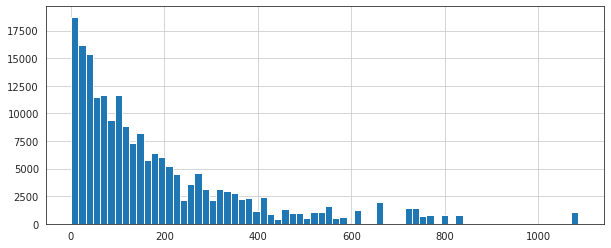

In [210]:
#x-axis is number of votes, y-axis is frquency
plt.figure(figsize=(10,4))
df_merged['count of votes'].hist(bins=70)

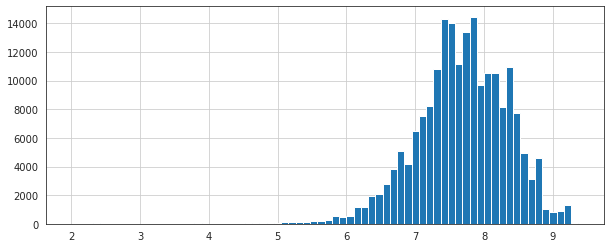

In [211]:
#x-axis is average rating and y-axis is frequenct of the rating
plt.figure(figsize=(10,4))
df_merged['average_rating'].hist(bins=70)

Uing the Weighted Average Formula AND the members column based on popularity
WR = (vR + mC/v+m) where:
- v is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [213]:
#looking at the member table column before normalizing (we have a range of 0-1,000,000)
df_merged.head(3)

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,,1,53492,31687,2,"Dementia, Music",ONA,1,4.22,448
1,.hackG.U. Returner,19,29806,2928,5,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
2,.hackG.U. Returner,19,19012,2928,10,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412


In [214]:
df_merged.members.max()

1013917

In [215]:
#normalizing the members column to a scale of 0-10
from sklearn import preprocessing

x = df_merged['members'].values #returns a numpy array
x = x.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
x_scaled = min_max_scaler.fit_transform(x)
df_merged['members'] = pd.DataFrame(x_scaled)

In [222]:
#after normalizing, we have a scale of 0-10
df_merged.head(3)

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,,1,53492,31687,2,"Dementia, Music",ONA,1,4.22,0.004073
1,.hackG.U. Returner,19,29806,2928,5,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,0.151665
2,.hackG.U. Returner,19,19012,2928,10,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,0.151665


In [217]:
# Calculate the mean vote of average rating column
C = df_merged['average_rating'].mean()
C

7.675886900001207

Calculating the number of votes, m, received by a movie in the 90th percentile.

In [218]:
m = df_merged['count of votes'].quantile(0.90)
print(m)

427.0


using m to filter out anime qualified for the model. ie anime with rating count >= m

In [259]:
q_anime = df_merged.copy().loc[df_merged['count of votes'] >= m]
q_anime.shape

(20341, 10)

In [260]:
df_merged.shape

(200000, 10)

In [261]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['count of votes']
    R = x['average_rating']
    P = x['members']
    # Calculation based on the IMDB formula
    return (0.5*(v/(v+m) * R) + (m/(m+v) * C)) + (0.5*(P))

In [262]:
#Define a feature 'score' and calculate its value with `weighted_rating()`
q_anime['score'] = q_anime.apply(weighted_rating, axis=1) 

In [269]:
#Sort anime based on score calculated above

q_anime = q_anime.sort_values('score', ascending=False)
q_anime = q_anime.drop_duplicates(subset=['name'])

#Print the top 15 movies
q_anime[['name', 'count of votes', 'average_rating', 'score']].head(20)

,name,count of votes,average_rating,score
41234,Death Note,1086,8.71,10.292223
164295,Shingeki no Kyojin,802,8.54,9.872948
60562,Fullmetal Alchemist Brotherhood,659,9.26,9.741418
175169,Sword Art Online,830,7.83,9.596751
171062,Steins;Gate,548,9.17,9.260225
33322,Code Geass Hangyaku no Lelouch,745,8.83,9.129677
6623,Angel Beats,725,8.39,9.024892
119460,Mirai Nikki TV,570,8.07,8.835123
183213,Tokyo Ghoul,474,8.07,8.808277
131869,No Game No Life,508,8.47,8.776449
